In [ ]:
#### Import the necessary libraries (numpy and pandas)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
#read the scraped file
df = pd.read_csv('tweetfinalVATscotland.csv')

/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (52,53,54,55,56,162,163,164,165,167,168,169,170,171,173,174,176,177,178,180,181,188,189,190,191,192,193,195,201,202,203,204,205,206,207,212,215,217,220,221,222,223,224,225,226,227,229,230,231,233,234,241,242,243,244,245,246,248,249,250,251,252,253,255,256,258,259,260,262,263,271,272,273,274,275,277,283,284,285,286,287,288,294) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7590 entries, 0 to 7589
Columns: 299 entries, Unnamed: 0 to quotedTweet.quotedTweet.cashtags
dtypes: bool(2), float64(103), int64(14), object(180)
memory usage: 17.2+ MB


In [4]:
# drop the columns that are not required
df = df.drop(['_type', 'url', 'renderedContent', 'id', 'user',
                 'quoteCount', 'conversationId', 'source', 'sourceUrl',
                 'outlinks', 'tcooutlinks', 'media', 'retweetedTweet',
                 'quotedTweet', 'inReplyToTweetId','inReplyToUser',
                 'mentionedUsers', 'coordinates', 'place', 'cashtags',
                 'user_type', 'userID', 'user_description_urls',
                 'user_protected', 'user_link_url', 'user_linkTcourl',
                 'user_profile_imageUrl', 'user_profile_bannerUrl', 'user_label',
                 'user_url', 'label._type', 'label.description', 'label.url',
                 'label.badgeUrl', 'label.longDescription', '_type', 'id',
                 'quotedTweet.mentionedUsers', 'quotedTweet.coordinates',
                 'quotedTweet.place', 'quotedTweet.hashtags', 'quotedTweet.cashtags',
                  'quotedTweet.source','quotedTweet.sourceUrl', 'quotedTweet.sourceLabel', 'quotedTweet.outlinks',
                 'quotedTweet.tcooutlinks', 'quotedTweet.media', 'quotedTweet.retweetedTweet',
                 'quotedTweet.quotedTweet', 'quotedTweet.inReplyToTweetId', 'quotedTweet.inReplyToUser'], axis = 'columns')

In [5]:
# drop additional columns that appear towards the right of the last relevant column
df.drop(df.columns[[22,23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
                    39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
                    57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
                    76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
                    95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
                    111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
                    126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
                    141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
                    156, 157, 158, 159, 160, 161]], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7590 entries, 0 to 7589
Columns: 109 entries, Unnamed: 0 to quotedTweet.quotedTweet.cashtags
dtypes: bool(1), float64(40), int64(10), object(58)
memory usage: 6.3+ MB


In [7]:
# drop additional columns that appear towards the right of the last relevant column
df.drop(df.columns[[22,23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
                    39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
                    57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
                    76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
                    95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7590 entries, 0 to 7589
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             7590 non-null   int64 
 1   date                   7590 non-null   object
 2   content                7590 non-null   object
 3   replyCount             7590 non-null   int64 
 4   retweetCount           7590 non-null   int64 
 5   likeCount              7590 non-null   int64 
 6   lang                   7590 non-null   object
 7   sourceLabel            7590 non-null   object
 8   hashtags               1370 non-null   object
 9   username               7590 non-null   object
 10  user_dispaly_name      7590 non-null   object
 11  user_description       6783 non-null   object
 12  user_raw_description   6783 non-null   object
 13  user_verified          7590 non-null   bool  
 14  user_created           7590 non-null   object
 15  user_followers_count 

In [9]:
# drop the rows
df.drop(df.index[5500:4907],0,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7590 entries, 0 to 7589
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             7590 non-null   int64 
 1   date                   7590 non-null   object
 2   content                7590 non-null   object
 3   replyCount             7590 non-null   int64 
 4   retweetCount           7590 non-null   int64 
 5   likeCount              7590 non-null   int64 
 6   lang                   7590 non-null   object
 7   sourceLabel            7590 non-null   object
 8   hashtags               1370 non-null   object
 9   username               7590 non-null   object
 10  user_dispaly_name      7590 non-null   object
 11  user_description       6783 non-null   object
 12  user_raw_description   6783 non-null   object
 13  user_verified          7590 non-null   bool  
 14  user_created           7590 non-null   object
 15  user_followers_count 

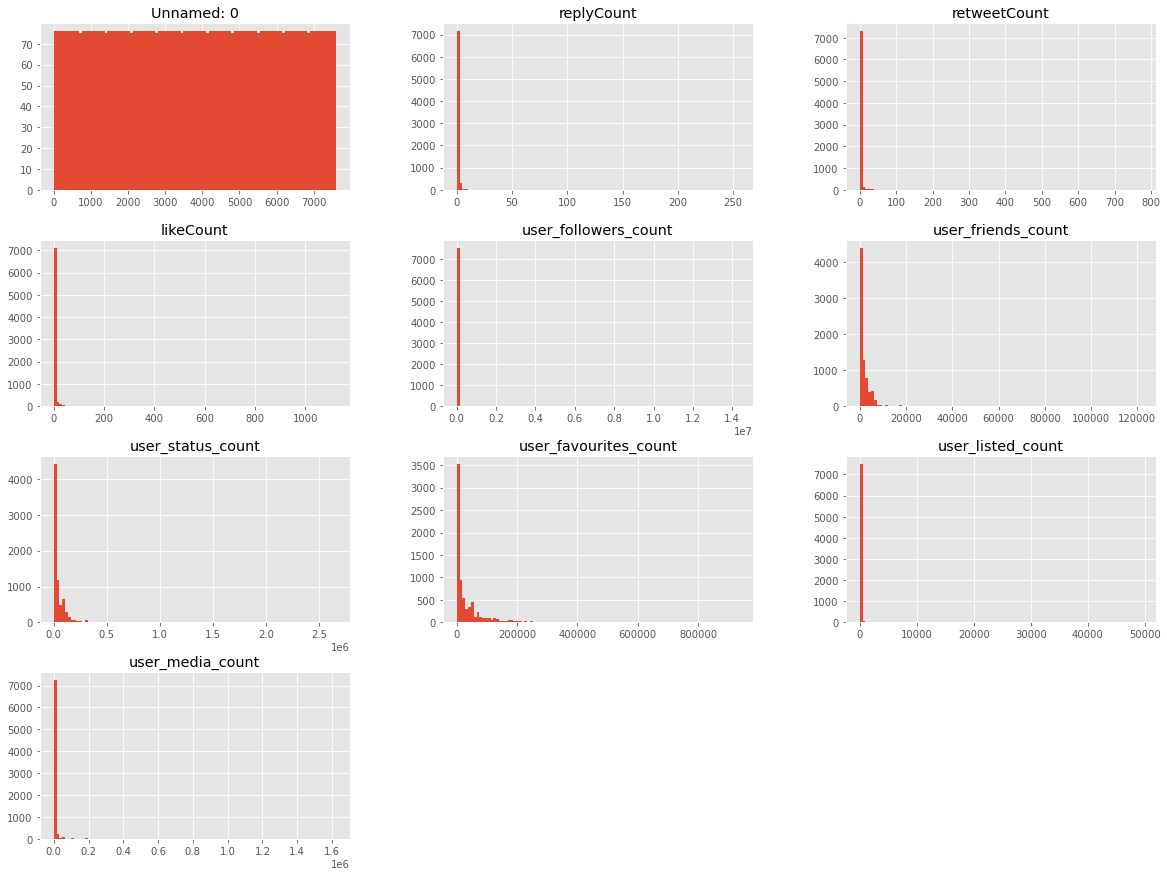

In [11]:
#visualising for better undertanding of the spread of the variables
df.hist(bins=100, figsize=(20,15))
plt.show()

In [12]:
# IMPORT modules for natural language processing

In [13]:
import re
import string
import nltk

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [15]:
#creating a stopwords set
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/noeljoseph/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df.columns

Index(['Unnamed: 0', 'date', 'content', 'replyCount', 'retweetCount',
       'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
       'user_dispaly_name', 'user_description', 'user_raw_description',
       'user_verified', 'user_created', 'user_followers_count',
       'user_friends_count', 'user_status_count', 'user_favourites_count',
       'user_listed_count', 'user_media_count', 'user_location'],
      dtype='object')

<AxesSubplot:>

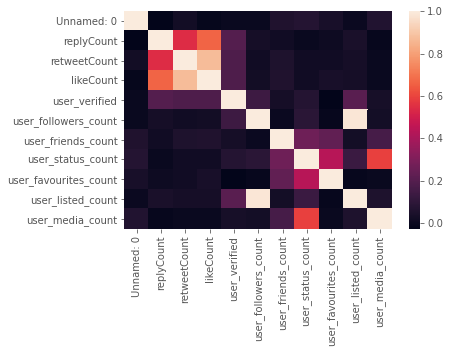

In [17]:
import seaborn as sns
sns.heatmap(df.corr())

Percentage False    0.970092
True     0.029908
Name: user_verified, dtype: float64


<AxesSubplot:ylabel='user_verified'>

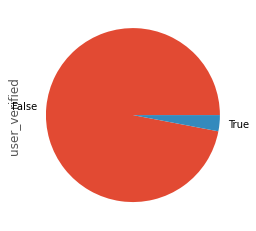

In [18]:
print('Percentage',df.user_verified.value_counts(normalize=True))
df.user_verified.value_counts(normalize=True).plot(kind='pie')

In [19]:
df.columns

Index(['Unnamed: 0', 'date', 'content', 'replyCount', 'retweetCount',
       'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
       'user_dispaly_name', 'user_description', 'user_raw_description',
       'user_verified', 'user_created', 'user_followers_count',
       'user_friends_count', 'user_status_count', 'user_favourites_count',
       'user_listed_count', 'user_media_count', 'user_location'],
      dtype='object')

In [20]:
# make a new dataframe with only content
content_df = df.drop(['Unnamed: 0', 'date', 'replyCount', 'retweetCount',
                      'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
                      'user_dispaly_name', 'user_description', 'user_raw_description',
                      'user_verified', 'user_created', 'user_followers_count',
                      'user_friends_count', 'user_status_count', 'user_favourites_count',
                      'user_listed_count', 'user_media_count', 'user_location'], axis=1)
content_df.head()

,content
0,@ghost_of_prof @zarkwan @dmck52 @tbablue1 @Ted...
1,@bilbo815 all VAT raised in Scotland goes on o...
2,@TERRYBUTCHER20 @IndyOnSkye They won't cancel ...
3,@OnThe7thDay1 @notbilge @CSG1973 @LeithWhisky ...
4,@IncognitoMV @CSG1973 @LeithWhisky @edlonguk @...


In [21]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7590 entries, 0 to 7589
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  7590 non-null   object
dtypes: object(1)
memory usage: 118.6+ KB


In [22]:
content_df = content_df.rename(columns={'content':'tokenized_content'})

In [23]:
content_df.head()

,tokenized_content
0,@ghost_of_prof @zarkwan @dmck52 @tbablue1 @Ted...
1,@bilbo815 all VAT raised in Scotland goes on o...
2,@TERRYBUTCHER20 @IndyOnSkye They won't cancel ...
3,@OnThe7thDay1 @notbilge @CSG1973 @LeithWhisky ...
4,@IncognitoMV @CSG1973 @LeithWhisky @edlonguk @...


In [24]:
def preprocess_content_text(content):
    
    #convert all text to lowercase
    content = content.lower()
    
    #remove any urls
    content = re.sub(r"http\S+|www\S+|https\s+", "", content, flags=re.MULTILINE)
    
    #remove punctuations
    content = content.translate(str.maketrans("", "", string.punctuation))
    
    #remove # from tweet
    content = re.sub(r'\#', "", content)
    
    #remove stopwords
    content_tokens = word_tokenize(content)
    filtered_words = [word for word in content_tokens if word not in stop_words]
    
    #stemming
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    
    #lemmatizing
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)
    

In [25]:
content_df.tokenized_content = content_df['tokenized_content'].apply(preprocess_content_text)

In [26]:
content_df.tokenized_content.head()
                

0    ghostofprof zarkwan dmck52 tbablue1 tedii69 qp...
1    bilbo815 vat raised scotland goes books scotti...
2    terrybutcher20 indyonskye wont cancel treasury...
3    onthe7thday1 notbilge csg1973 leithwhisky edlo...
4    incognitomv csg1973 leithwhisky edlonguk marti...
Name: tokenized_content, dtype: object

In [27]:
#content_df = content_df.drop_duplicates('content')

In [28]:
#stemming
stemmer = PorterStemmer()
def stemming(data):
    content = [stemmer.stem(word) for word in data]
    return data

In [29]:
content_df['tokenized_content'] = content_df['tokenized_content'].apply(lambda x: stemming(x))

In [30]:
# check the data after pre-processing
content_df['tokenized_content'][0]

'ghostofprof zarkwan dmck52 tbablue1 tedii69 qp12guy pjnichols ayerightyiare tedditchburnnnp dmaz95hayden 2351onthelist northerner juantu81993858 mikeythebuddie mehercle hai62 davidda54355054 83boabobski mrlouisb22 gman86159160 alexfergus0n monadvx1 dundeetrooper angeblue55 bustersbarspain dotsy1978 honestdan5 asimov200 afc1903mad alexc1995324 cromwellian77 dorokusaitweet 45bally dsgaire catherinemcker dealatrip douglasstocks2 isleofbuteman bishopsmithy linairemcrae smuraok iscotgov wildmountain1 govruk elmo11211 xxander1968 billylennox6 boycottsbat flyingsaltire people prepared pay much higher taxes denmark vat 25 everything newspapers even children ’ clothes exempt tax uk scotland dependency economy enough highearning taxpayers fund government'

In [31]:
# import VADER for sentiment analysis
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/noeljoseph/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [33]:
def sentiment_vader(content):
    over_all_polarity = sia.polarity_scores(content)
    if over_all_polarity['compound'] >= 0.05:
        return "positive"
    elif over_all_polarity['compound'] <= -0.05:
        return "negative"
    else:
        return "neutral"

In [34]:
content_df['sentiment_vader'] = content_df['tokenized_content'].apply(lambda x: sentiment_vader(x))

In [35]:
#diplay the dataframe with the new column for sentiment
content_df

,tokenized_content,sentiment_vader
0,ghostofprof zarkwan dmck52 tbablue1 tedii69 qp...,positive
1,bilbo815 vat raised scotland goes books scotti...,neutral
2,terrybutcher20 indyonskye wont cancel treasury...,positive
3,onthe7thday1 notbilge csg1973 leithwhisky edlo...,neutral
4,incognitomv csg1973 leithwhisky edlonguk marti...,neutral
...,...,...
7585,thesnp include record employment well lowest u...,negative
7586,deescattered pemcneil annenougat1959 ruthdavid...,positive
7587,sfi123 maryconnor4567 left shetland police pol...,negative
7588,sfi123 maryconnor4567 rules made government po...,negative


In [36]:
print('Percentage',content_df['sentiment_vader'].value_counts(normalize=True))
#content_df.sentiment_vader._counts(normalize=True).plot(kind='pie')

Percentage positive    0.505138
negative    0.281950
neutral     0.212912
Name: sentiment_vader, dtype: float64


In [ ]:
positive_tweets= content_df[content_df.sentiment_vader == 'positive']
positive_tweets = positive_tweets.sort_value

In [37]:
#extracting the positive for state
def positive_mention_state(content):
    terms = re.findall("Treasury|UK|HMRC|England|union|reserved|tories", content)
    
    return terms

In [38]:
content_df['centre_terms_mentioned'] = content_df['tokenized_content'].apply(lambda x: positive_mention_state(x))

In [39]:
content_df

,tokenized_content,sentiment_vader,centre_terms_mentioned
0,ghostofprof zarkwan dmck52 tbablue1 tedii69 qp...,positive,[]
1,bilbo815 vat raised scotland goes books scotti...,neutral,[]
2,terrybutcher20 indyonskye wont cancel treasury...,positive,[]
3,onthe7thday1 notbilge csg1973 leithwhisky edlo...,neutral,[]
4,incognitomv csg1973 leithwhisky edlonguk marti...,neutral,[]
...,...,...,...
7585,thesnp include record employment well lowest u...,negative,[]
7586,deescattered pemcneil annenougat1959 ruthdavid...,positive,[]
7587,sfi123 maryconnor4567 left shetland police pol...,negative,[]
7588,sfi123 maryconnor4567 rules made government po...,negative,[]


In [40]:
#extracting the positive for state
def positive_mention_state(content):
    terms = re.findall("SNP|holyrood|Sturgeon", content)
    
    return terms

In [41]:
content_df['state_terms_mentioned'] = content_df['tokenized_content'].apply(lambda x: positive_mention_state(x))

In [42]:
content_df

,tokenized_content,sentiment_vader,centre_terms_mentioned,state_terms_mentioned
0,ghostofprof zarkwan dmck52 tbablue1 tedii69 qp...,positive,[],[]
1,bilbo815 vat raised scotland goes books scotti...,neutral,[],[]
2,terrybutcher20 indyonskye wont cancel treasury...,positive,[],[]
3,onthe7thday1 notbilge csg1973 leithwhisky edlo...,neutral,[],[]
4,incognitomv csg1973 leithwhisky edlonguk marti...,neutral,[],[]
...,...,...,...,...
7585,thesnp include record employment well lowest u...,negative,[],[]
7586,deescattered pemcneil annenougat1959 ruthdavid...,positive,[],[]
7587,sfi123 maryconnor4567 left shetland police pol...,negative,[],[]
7588,sfi123 maryconnor4567 rules made government po...,negative,[],[]


In [43]:
#extracting the correct and incorrect attribution for state

def perception(content):
    if(content['sentiment_vader'] == 'positive' and len(content['centre_terms_mentioned'])!=0):
        return 'correct'
    elif(content['sentiment_vader'] == 'negative' and len(content['centre_terms_mentioned'])!=0):
        return 'correct'
    elif(content['sentiment_vader'] == 'positive' and len(content['state_terms_mentioned'])!=0):
        return 'incorrect'
    elif(content['sentiment_vader'] == 'negative' and len(content['state_terms_mentioned'])!=0):
        return 'incorrect'
    
    return 'non-opinionated'

In [44]:
content_df['perception'] = content_df.apply(perception, axis=1)

In [45]:
content_df

,tokenized_content,sentiment_vader,centre_terms_mentioned,state_terms_mentioned,perception
0,ghostofprof zarkwan dmck52 tbablue1 tedii69 qp...,positive,[],[],non-opinionated
1,bilbo815 vat raised scotland goes books scotti...,neutral,[],[],non-opinionated
2,terrybutcher20 indyonskye wont cancel treasury...,positive,[],[],non-opinionated
3,onthe7thday1 notbilge csg1973 leithwhisky edlo...,neutral,[],[],non-opinionated
4,incognitomv csg1973 leithwhisky edlonguk marti...,neutral,[],[],non-opinionated
...,...,...,...,...,...
7585,thesnp include record employment well lowest u...,negative,[],[],non-opinionated
7586,deescattered pemcneil annenougat1959 ruthdavid...,positive,[],[],non-opinionated
7587,sfi123 maryconnor4567 left shetland police pol...,negative,[],[],non-opinionated
7588,sfi123 maryconnor4567 rules made government po...,negative,[],[],non-opinionated


In [46]:
df.head()

,Unnamed: 0,date,content,replyCount,retweetCount,likeCount,lang,sourceLabel,hashtags,username,...,user_raw_description,user_verified,user_created,user_followers_count,user_friends_count,user_status_count,user_favourites_count,user_listed_count,user_media_count,user_location
0,0,2022-08-23 08:37:37+00:00,@ghost_of_prof @zarkwan @dmck52 @tbablue1 @Ted...,1,0,0,en,Twitter for iPad,NaN,bellesareblue,...,General News History General News,False,2018-07-24T22:13:35+00:00,1657,1387,221659,265400,10,1,"Scotland, United Kingdom"
1,1,2022-08-23 07:53:29+00:00,@bilbo815 all VAT raised in Scotland goes on o...,1,1,1,en,Twitter for Android,NaN,Glenlyon17,...,Building a new Scotland 🏴󠁧󠁢󠁳󠁣󠁴󠁿,False,2019-03-30T14:45:47+00:00,4066,3987,80256,69917,3,2376,NaN
2,2,2022-08-22 18:48:58+00:00,@TERRYBUTCHER20 @IndyOnSkye They won't cancel ...,0,0,0,en,Twitter for Android,NaN,JonoCC,...,NaN,False,2010-05-30T18:59:22+00:00,50,231,2260,11892,0,41,"Dundee, Scotland"
3,3,2022-08-22 18:13:48+00:00,@OnThe7thDay1 @notbilge @CSG1973 @LeithWhisky ...,0,0,1,en,Twitter for iPhone,NaN,IncognitoMV,...,Yacht dweller. Enjoys messing about with class...,False,2021-10-01T11:51:45+00:00,468,526,10158,10441,0,1260,NaN
4,4,2022-08-22 17:52:42+00:00,@IncognitoMV @CSG1973 @LeithWhisky @edlonguk @...,1,0,0,en,Twitter for Android,NaN,OnThe7thDay1,...,They rested.,False,2021-05-05T06:04:59+00:00,417,653,9467,5315,2,2341,"Jockistan, Occupied Scotland"


In [47]:
content_perception_df = pd.concat([content_df, df], axis=1)

In [48]:
content_perception_df.head()

,tokenized_content,sentiment_vader,centre_terms_mentioned,state_terms_mentioned,perception,Unnamed: 0,date,content,replyCount,retweetCount,...,user_raw_description,user_verified,user_created,user_followers_count,user_friends_count,user_status_count,user_favourites_count,user_listed_count,user_media_count,user_location
0,ghostofprof zarkwan dmck52 tbablue1 tedii69 qp...,positive,[],[],non-opinionated,0,2022-08-23 08:37:37+00:00,@ghost_of_prof @zarkwan @dmck52 @tbablue1 @Ted...,1,0,...,General News History General News,False,2018-07-24T22:13:35+00:00,1657,1387,221659,265400,10,1,"Scotland, United Kingdom"
1,bilbo815 vat raised scotland goes books scotti...,neutral,[],[],non-opinionated,1,2022-08-23 07:53:29+00:00,@bilbo815 all VAT raised in Scotland goes on o...,1,1,...,Building a new Scotland 🏴󠁧󠁢󠁳󠁣󠁴󠁿,False,2019-03-30T14:45:47+00:00,4066,3987,80256,69917,3,2376,NaN
2,terrybutcher20 indyonskye wont cancel treasury...,positive,[],[],non-opinionated,2,2022-08-22 18:48:58+00:00,@TERRYBUTCHER20 @IndyOnSkye They won't cancel ...,0,0,...,NaN,False,2010-05-30T18:59:22+00:00,50,231,2260,11892,0,41,"Dundee, Scotland"
3,onthe7thday1 notbilge csg1973 leithwhisky edlo...,neutral,[],[],non-opinionated,3,2022-08-22 18:13:48+00:00,@OnThe7thDay1 @notbilge @CSG1973 @LeithWhisky ...,0,0,...,Yacht dweller. Enjoys messing about with class...,False,2021-10-01T11:51:45+00:00,468,526,10158,10441,0,1260,NaN
4,incognitomv csg1973 leithwhisky edlonguk marti...,neutral,[],[],non-opinionated,4,2022-08-22 17:52:42+00:00,@IncognitoMV @CSG1973 @LeithWhisky @edlonguk @...,1,0,...,They rested.,False,2021-05-05T06:04:59+00:00,417,653,9467,5315,2,2341,"Jockistan, Occupied Scotland"


Percentage non-opinionated    0.913439
correct            0.078393
incorrect          0.008169
Name: perception, dtype: float64


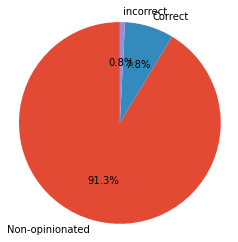

In [49]:
print('Percentage',content_perception_df.perception.value_counts(normalize=True))
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(content_perception_df['perception'].value_counts().tolist(), 
        labels=['Non-opinionated', 'Correct', 'incorrect'], autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

In [50]:
#def perception(voter):
    #if voter == "1":
        #return "correct"
    #elif voter == "":
        #return "non-partisan"
    #elif voter == "0":
        #return "incorrect"

In [51]:
#content_perception_df['voter'] = content_perception_df['voter_perception'].apply(perception)

In [52]:
#content_perception_df

In [53]:
#fig = plt.figure(figsize=(5,5))
#sns.countplot(x='voter', data = content_perception_df)

#### fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor': "black"}
tags = content_perception_df['voter'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors, startangle=90, wedgeprops = wp,
         explode = explode, label="")
plt.title("attribution of responsibility by voters")

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [55]:
vect = CountVectorizer(ngram_range=(1,2)).fit(content_perception_df['tokenized_content'])

In [56]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 133703

First 20 features:
 ['000', '000 total', '00000', '00000 gbp', '003ppl', '003ppl last', '005', '005 uk', '005ppl', '005ppl last', '007pseudonym', '007pseudonym chrisgiles', '008ppl', '008ppl last', '009ppl', '009ppl last', '01', '01 revenue', '011ppl', '011ppl last']


In [57]:
x = content_perception_df['tokenized_content']
y = content_perception_df['perception']
x = vect.transform(x)

In [58]:
x.shape

(7590, 133703)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [60]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (6072, 133703)
Size of y_train: (6072,)
Size of x_test: (1518, 133703)
Size of y_test: (1518,)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [62]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 95.59%


In [101]:
logreg.intercept_

array([-1.43817804, -2.96371407,  4.40189211])

In [102]:
logreg.coef_

array([[-0.00247931,  0.        , -0.00245913, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00028979,  0.        , -0.00039762, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0027691 ,  0.        ,  0.00285675, ...,  0.        ,
         0.        ,  0.        ]])

In [63]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[  49    0   49]
 [   1    3   10]
 [   7    0 1399]]


                 precision    recall  f1-score   support

        correct       0.86      0.50      0.63        98
      incorrect       1.00      0.21      0.35        14
non-opinionated       0.96      1.00      0.98      1406

       accuracy                           0.96      1518
      macro avg       0.94      0.57      0.65      1518
   weighted avg       0.95      0.96      0.95      1518



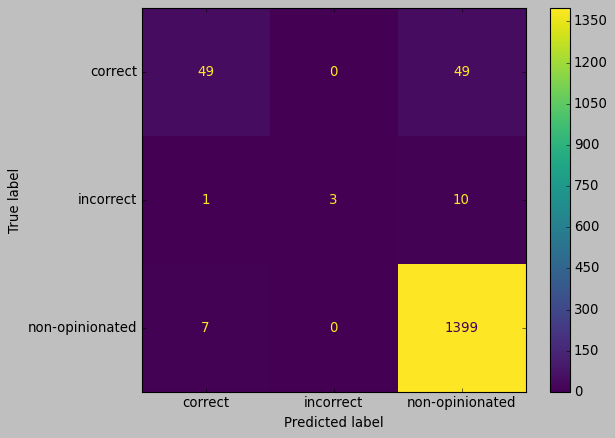

In [64]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid={'C':[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [67]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [68]:
y_pred= grid.predict(x_test)

In [69]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 95.85%


In [70]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[  49    0   49]
 [   1    3   10]
 [   7    0 1399]]


                 precision    recall  f1-score   support

        correct       0.86      0.50      0.63        98
      incorrect       1.00      0.21      0.35        14
non-opinionated       0.96      1.00      0.98      1406

       accuracy                           0.96      1518
      macro avg       0.94      0.57      0.65      1518
   weighted avg       0.95      0.96      0.95      1518



In [71]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [72]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:2f}%".format(svc_acc*100))

test accuracy: 96.706192%


In [73]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[  66    0   32]
 [   0    4   10]
 [   8    0 1398]]


                 precision    recall  f1-score   support

        correct       0.89      0.67      0.77        98
      incorrect       1.00      0.29      0.44        14
non-opinionated       0.97      0.99      0.98      1406

       accuracy                           0.97      1518
      macro avg       0.95      0.65      0.73      1518
   weighted avg       0.97      0.97      0.96      1518



In [74]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel': ["linear", "poly", "rbf", "sigmoid"],
    'degree': [1,3,5,7],
    'gamma': [0.01, 1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [75]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 1}


In [76]:
y_pred = grid.predict(x_test)

In [77]:
logreg_acc= accuracy_score(y_pred, y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 96.71%


In [78]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[  66    0   32]
 [   0    4   10]
 [   8    0 1398]]


                 precision    recall  f1-score   support

        correct       0.89      0.67      0.77        98
      incorrect       1.00      0.29      0.44        14
non-opinionated       0.97      0.99      0.98      1406

       accuracy                           0.97      1518
      macro avg       0.95      0.65      0.73      1518
   weighted avg       0.97      0.97      0.96      1518



In [79]:
test_df = pd.read_csv('tweetfinalhealthkerala.csv')

/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (28,54,162,163,164,165,166,168,169,171,172,173,174,175,176,183,184,185,186,187,188,190,196,197,198,199,200,201,202,207,210,212,213,214,215) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [80]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 217 entries, Unnamed: 0 to user.label.longDescription
dtypes: bool(2), float64(64), int64(14), object(137)
memory usage: 32.8+ MB


In [81]:
# drop the columns that are not required
test_df = test_df.drop(['_type', 'url', 'renderedContent', 'id', 'user',
                 'quoteCount', 'conversationId', 'source', 'sourceUrl',
                 'outlinks', 'tcooutlinks', 'media', 'retweetedTweet',
                 'quotedTweet', 'inReplyToTweetId','inReplyToUser',
                 'mentionedUsers', 'coordinates', 'place', 'cashtags',
                 'user_type', 'userID', 'user_description_urls',
                 'user_protected', 'user_link_url', 'user_linkTcourl',
                 'user_profile_imageUrl', 'user_profile_bannerUrl', 'user_label',
                 'user_url', 'label._type', 'label.description', 'label.url',
                 'label.badgeUrl', 'label.longDescription', '_type', 'id',
                 'quotedTweet.mentionedUsers', 'quotedTweet.coordinates',
                 'quotedTweet.place', 'quotedTweet.hashtags', 'quotedTweet.cashtags',
                 'user.label._type', 'user.label.description', 'user.label.url',
                 'user.label.badgeUrl','user.label.longDescription', 'quotedTweet.source',
                 'quotedTweet.sourceUrl', 'quotedTweet.sourceLabel', 'quotedTweet.outlinks',
                 'quotedTweet.tcooutlinks', 'quotedTweet.media', 'quotedTweet.retweetedTweet',
                 'quotedTweet.quotedTweet', 'quotedTweet.inReplyToTweetId', 'quotedTweet.inReplyToUser'], axis = 'columns')

In [82]:
# drop additional columns that appear towards the right of the last relevant column
test_df.drop(test_df.columns[[22,23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
                    39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
                    57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
                    76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
                    95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
                    111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
                    126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
                    141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
                    156, 157, 158, 159, 160, 161]], axis=1, inplace=True)

In [83]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             20000 non-null  int64 
 1   date                   20000 non-null  object
 2   content                20000 non-null  object
 3   replyCount             20000 non-null  int64 
 4   retweetCount           20000 non-null  int64 
 5   likeCount              20000 non-null  int64 
 6   lang                   20000 non-null  object
 7   sourceLabel            20000 non-null  object
 8   hashtags               7826 non-null   object
 9   username               20000 non-null  object
 10  user_dispaly_name      19999 non-null  object
 11  user_description       17983 non-null  object
 12  user_raw_description   17983 non-null  object
 13  user_verified          20000 non-null  bool  
 14  user_created           20000 non-null  object
 15  user_followers_coun

In [84]:
# drop the rows
test_df.drop(test_df.index[:19800],0,inplace=True)

In [85]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 19800 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             200 non-null    int64 
 1   date                   200 non-null    object
 2   content                200 non-null    object
 3   replyCount             200 non-null    int64 
 4   retweetCount           200 non-null    int64 
 5   likeCount              200 non-null    int64 
 6   lang                   200 non-null    object
 7   sourceLabel            200 non-null    object
 8   hashtags               58 non-null     object
 9   username               200 non-null    object
 10  user_dispaly_name      200 non-null    object
 11  user_description       164 non-null    object
 12  user_raw_description   164 non-null    object
 13  user_verified          200 non-null    bool  
 14  user_created           200 non-null    object
 15  user_followers_co

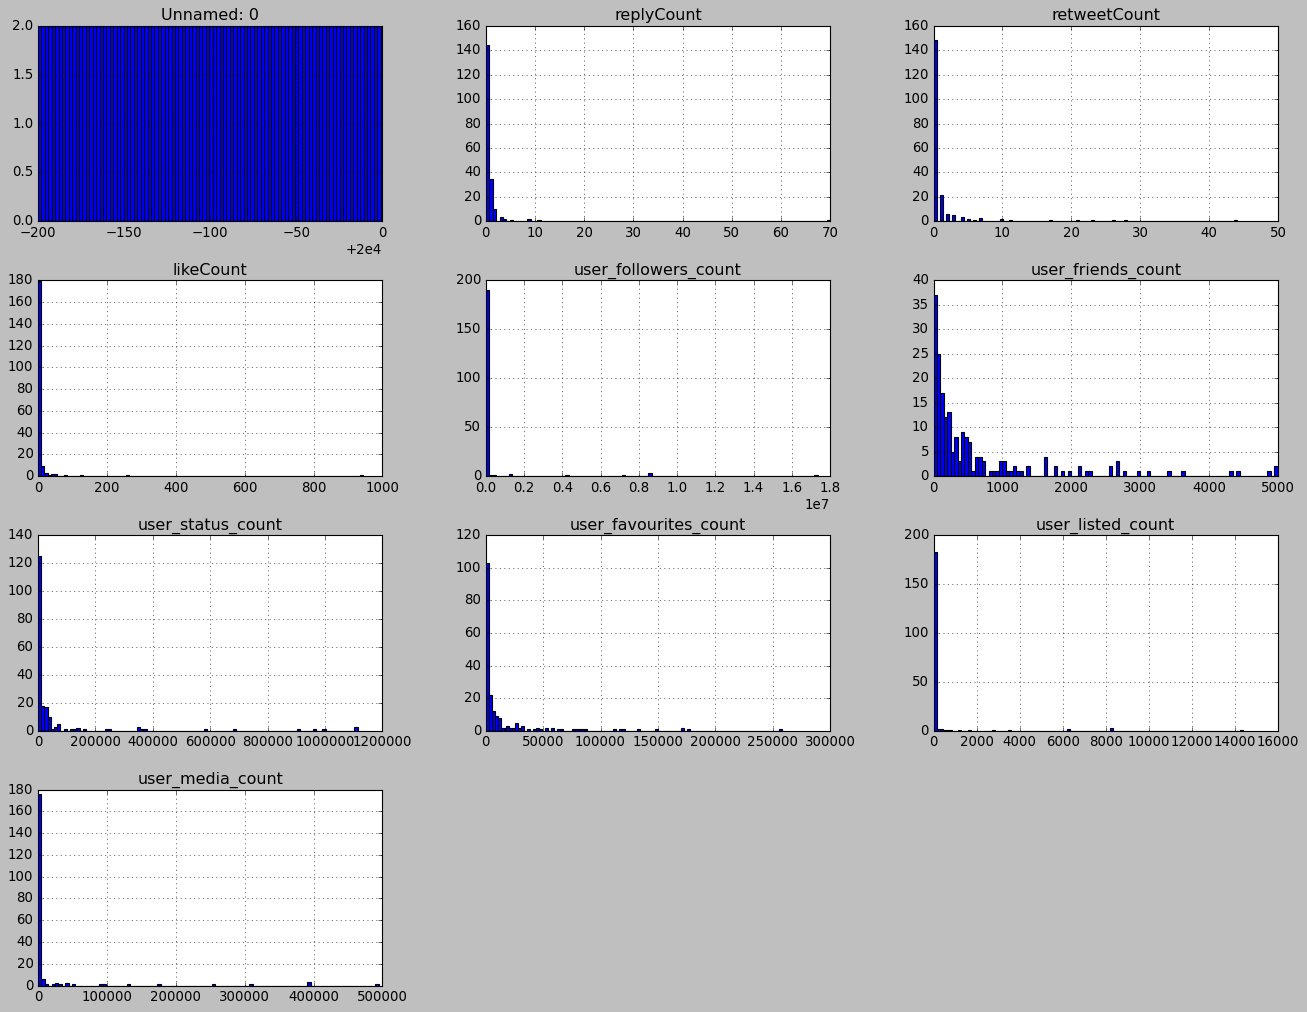

In [86]:
#visualising for better undertanding of the spread of the variables
test_df.hist(bins=100, figsize=(20,15))
plt.show()

In [87]:
test_df.columns

Index(['Unnamed: 0', 'date', 'content', 'replyCount', 'retweetCount',
       'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
       'user_dispaly_name', 'user_description', 'user_raw_description',
       'user_verified', 'user_created', 'user_followers_count',
       'user_friends_count', 'user_status_count', 'user_favourites_count',
       'user_listed_count', 'user_media_count', 'user_location'],
      dtype='object')

In [88]:
content_test_df = test_df.drop(['Unnamed: 0', 'date', 'replyCount', 'retweetCount',
                      'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
                      'user_dispaly_name', 'user_description', 'user_raw_description',
                      'user_verified', 'user_created', 'user_followers_count',
                      'user_friends_count', 'user_status_count', 'user_favourites_count',
                      'user_listed_count', 'user_media_count', 'user_location'], axis=1)
content_test_df.head()

,content
19800,I'm a kerala state syllabus +2 student. Every...
19801,"With a total population of 35 million, Kerala ..."
19802,Kerala govt partially relents after a long fig...
19803,@AdvMamtaSharma Justice for kerala students pl...
19804,The Central Gas Manifold System for Oxygen sup...


In [89]:
def preprocess_content_test_text(content):
    
    #convert all text to lowercase
    content = content.lower()
    
    #remove any urls
    content = re.sub(r"http\S+|www\S+|https\s+", "", content, flags=re.MULTILINE)
    
    #remove punctuations
    content = content.translate(str.maketrans("", "", string.punctuation))
    
    #remove # from tweet
    content = re.sub(r'\#', "", content)
    
    #remove stopwords
    content_tokens = word_tokenize(content)
    filtered_words = [word for word in content_tokens if word not in stop_words]
    
    #stemming
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    
    #lemmatizing
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)
    

In [90]:
content_test_df.content = content_test_df['content'].apply(preprocess_content_test_text)

In [91]:
content_test_df.content.head()

19800    im kerala state syllabus 2 student everyone ba...
19801    total population 35 million kerala currently n...
19802    kerala govt partially relents long fight us he...
19803    advmamtasharma justice kerala students please ...
19804    central gas manifold system oxygen supply esta...
Name: content, dtype: object

In [92]:
#stemming
stemmer = PorterStemmer()
def stemming(data):
    content = [stemmer.stem(word) for word in data]
    return data

In [93]:
content_test_df['content'] = content_test_df['content'].apply(lambda x: stemming(x))

In [94]:
content_test_df

,content
19800,im kerala state syllabus 2 student everyone ba...
19801,total population 35 million kerala currently n...
19802,kerala govt partially relents long fight us he...
19803,advmamtasharma justice kerala students please ...
19804,central gas manifold system oxygen supply esta...
...,...
19995,short hindu temple anywhere india muslim chris...
19996,kerala health worker ’ fb post siva temple lak...
19997,1798 asha workers infected covid kerala far tw...
19998,kerala health services department ’ dr aarathy...


In [95]:
vect = CountVectorizer(ngram_range=(1,2)).fit(content_test_df['content'])

In [96]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 5431

First 20 features:
 ['0471', '0471 2551056', '10', '10 govt', '10 march', '100', '100 perfection', '100 years', '1000s', '1000s health', '10750', '10750 vials', '11', '11 332', '11cms', '11cms nonbjp', '12thboardexams2021', '12thboardexams2021 cancelled', '14', '14 2021']


In [97]:
x = content_test_df['content']
x = vect.transform(x)

In [98]:
x.shape

(200, 5431)

In [99]:
content_test_df.shape

(200, 1)

In [100]:
prediction = SVCmodel.predict(x)

ValueError: X has 5431 features per sample; expecting 133703